# Importing Modules

In [60]:
# Data import
import os
import sqlite3 as sq3

# Data manipulation
import numpy as np
import pandas as pd

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Data Manipulation
from scipy import stats

# Data Processing
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Setting up Notebook

# Importing Data

In [61]:
def getPath(fileName):
    path = "data"

    return os.sep.join([path, fileName])

## Import from [`Database`]

### Sqlite

In [62]:
# Create a connection to the database
connection = sq3.connect(getPath("classic_rock.db"))

# Write the query
query = """
        SELECT *
        FROM rock_songs;
        """

# Execute the query
songs_data = pd.read_sql(query, connection)

read_sql() has many useful parameters
* head
* coerce_float              : Converts non-numeric columns to floats
* parse_dates               : Converts columns to datetime
* index_col                 : Sets the DataFrame index to a column
* chunksize                 : Return an iterable object for a specific number of rows

## Import from [`CSV`,`TSV`]

In [63]:
housing_data = pd.read_csv(getPath("Ames_Housing_Data.tsv"), sep="\t")

# Analyzing Data

In [64]:
# Display column names and data types
songs_data.info()

# Display the first 5 rows of the data
songs_data.head()

# Display the last 10 rows of the data
songs_data.tail(10)

# Display column properties
songs_data.describe()

# Display the number of unique values in each column
songs_data.nunique()

# Display the number of missing values in each column
songs_data.isnull().sum()

# Displays transposed data
songs_data.T

# Display the data types of each column
songs_data.dtypes

# Display the shape of the data
songs_data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1650 entries, 0 to 1649
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Song          1650 non-null   object 
 1   Artist        1650 non-null   object 
 2   Release_Year  1650 non-null   float64
 3   PlayCount     1650 non-null   int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 51.7+ KB


(1650, 4)

# Cleaning Data

## Removing Duplicates

### Removing Duplicate Rows

In [65]:
# Drop duplicate rows
housing_data_dups_removed = housing_data.drop_duplicates()

print(
    f"Number of duplicate rows removed: {housing_data.shape[0] - housing_data_dups_removed.shape[0]}"
)

# Check if all the indexes are unique
housing_data_dups_removed.index.is_unique

Number of duplicate rows removed: 1


True

### Removing Duplicates of a Column

In [66]:
# Check if the 'Order' column has duplicate values
housing_data["Order"].is_unique

# .duplicated()         -- Returns a boolean series with True for duplicate rows
# .value_counts()       -- Returns the count of each unique value
housing_data.duplicated(["Order"]).value_counts()

# Drop duplicate rows based on the 'Order' column
housing_data.drop_duplicates(subset=["Order"])

print(
    f"Number of duplicate rows removed: {housing_data.shape[0] - housing_data_dups_removed.shape[0]}"
)

Number of duplicate rows removed: 1


## Handling Missing Values

### Dropping Rows

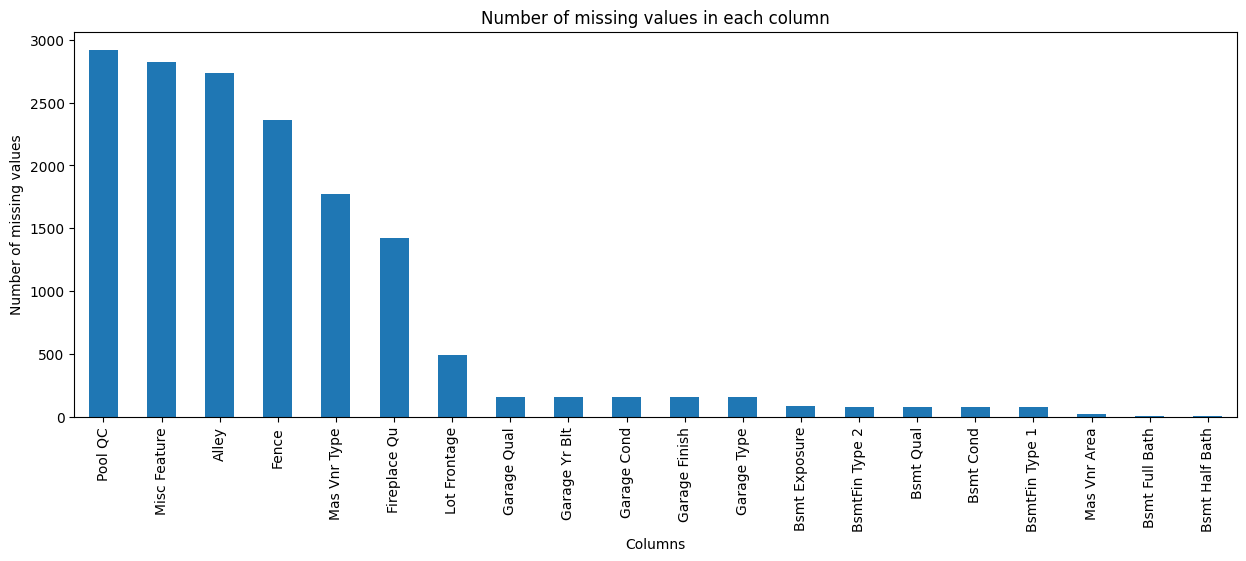

,Order,PID,MS SubClass,MS Zoning,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,1,526301100,20,RL,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
2,2,526350040,20,RH,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
3,3,526351010,20,RL,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
4,4,526353030,20,RL,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2926,2926,923275080,80,RL,7937,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,GdPrv,NaN,0,3,2006,WD,Normal,142500
2927,2927,923276100,20,RL,8885,Pave,NaN,IR1,Low,AllPub,...,0,NaN,MnPrv,NaN,0,6,2006,WD,Normal,131000
2928,2928,923400125,85,RL,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,132000
2929,2929,924100070,20,RL,10010,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,170000


In [67]:
# Check number of missing values in each column
housing_data.isnull().sum().sort_values(ascending=False).head(20).plot(
    kind="bar", figsize=(15, 5)
)

# Setup the figure properties
plt.xlabel("Columns")
plt.ylabel("Number of missing values")
plt.title("Number of missing values in each column")
plt.show()

# Drop columns with specific columns with significant number of missing values
housing_data.drop("Lot Frontage", axis=1)

### Substituting with Median or Mean

In [68]:
# Fill missing values with the median value of the column
housing_data["Lot Frontage"] = housing_data["Lot Frontage"].fillna(
    housing_data["Lot Frontage"].median()
)

# Fill missing values with the mean value of the column
housing_data["Mas Vnr Area"] = housing_data["Mas Vnr Area"].fillna(
    housing_data["Mas Vnr Area"].mean()
)

## Handling Outliers

### Analysis

#### Uni-variate Analysis

<Axes: xlabel='SalePrice'>

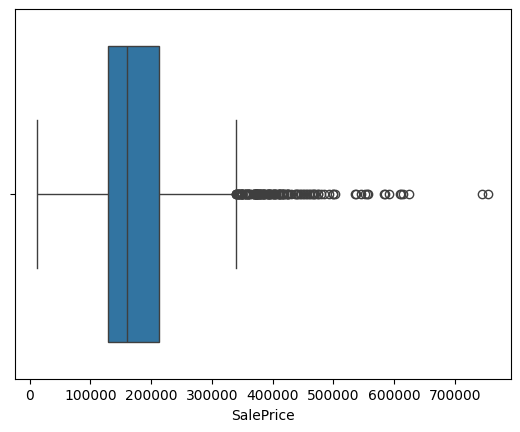

In [69]:
# Finding outliers in a dataset
sns.boxplot(x=housing_data["SalePrice"])

#### Bi-variate Analysis

<Axes: xlabel='Gr Liv Area', ylabel='SalePrice'>

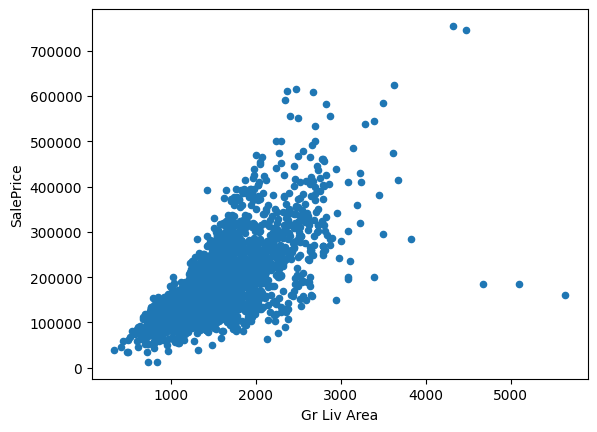

In [70]:
housing_data.plot.scatter(x="Gr Liv Area", y="SalePrice")

#### Z-Score Analysis

In [71]:
## Threshold -- Z -> 3 to -3

housing_data["LQFSF"] = stats.zscore(housing_data["Low Qual Fin SF"])

### Deleting Outliers

<Axes: xlabel='Gr Liv Area', ylabel='SalePrice'>

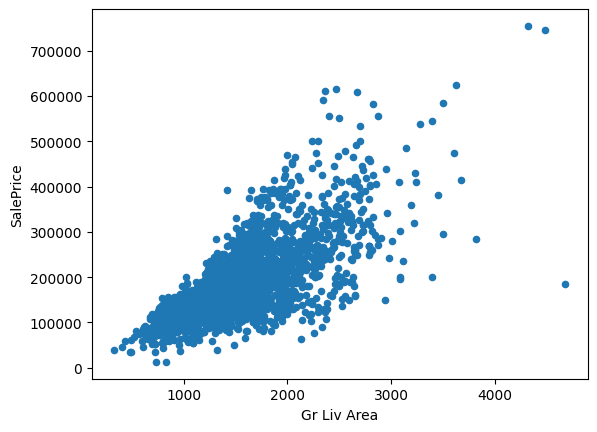

In [72]:
# Deleting specific rows
housing_data_non_null = housing_data.drop(housing_data.index[[1499, 2181]])
housing_data_non_null.plot.scatter(x="Gr Liv Area", y="SalePrice")

# Preprocessing

## Looking for Correlations

### Correlation Matrix

In [73]:
# Calculating the correlation matrix and selecting the strongly correlated columns
# .select_dtypes(include=[np.number])   -- Selects only numerical columns as correlation can only be calculated between numerical columns
# .corr()                               -- Calculates pairwise correlation of columns
# ['SalesPrice']                        -- Selects the target column
# [:-1]                                 -- Excludes the last row (SalesPrice) as it is always 1
# .abs()                                -- Takes the absolute value of the correlation so that strength of correlation is can be compared
# .sort_values(ascending=False)         -- Sorts the values in descending order
# .loc[lambda x : x > 0.5]              -- Filters the values greater than 0.5 i.e. Strongly correlated
# .index                                -- Selects the column names
housing_top_features_cols = (
    housing_data.select_dtypes(include=[np.number])
    .corr()["SalePrice"][:-1]
    .abs()
    .sort_values(ascending=False)
    .loc[lambda x: x > 0.5]
    .index
)
print(housing_top_features_cols)

Index(['SalePrice', 'Overall Qual', 'Gr Liv Area', 'Garage Cars',
       'Garage Area', 'Total Bsmt SF', '1st Flr SF', 'Year Built', 'Full Bath',
       'Year Remod/Add', 'Garage Yr Blt', 'Mas Vnr Area'],
      dtype='object')


### Pair Plot

In [74]:
# Selecting numerical columns as pair plot can only be made between numerical columns
housing_data_num = housing_data.select_dtypes(include=[np.number])
housing_top_features = housing_data_num[
    housing_top_features_cols.append(pd.Index(["SalePrice"]))
]
housing_weak_features = housing_data_num[
    housing_data_num.columns.difference(housing_top_features_cols)
]

# Making pair plots of SalesPrice with strongly correlated column
for col in range(0, len(housing_top_features.columns), 12):
    sns.pairplot(
        data=housing_top_features,
        x_vars=housing_top_features.columns[col : col + 12],
        y_vars=["SalePrice"],
        plot_kws={"color": "green"},
    )

# Making pair plots of SalesPrice with each column
for col in range(0, len(housing_weak_features.columns), 14):
    sns.pairplot(
        data=housing_weak_features,
        x_vars=housing_weak_features.columns[col : col + 14],
        y_vars=["SalePrice"],
        plot_kws={"color": "red"},
    )


ValueError: Data must be 1-dimensional, got ndarray of shape (2931, 2) instead

## Normalizing

### Checking Normal Distribution

In [ ]:
# Display the skewness of the SalePrice column
sales_price_skewness = housing_data["SalePrice"].skew()
print(f"Skewness of SalePrice: {sales_price_skewness.round(2)}")

# Display plot to check the distribution of SalePrice
sns.displot(housing_data["SalePrice"], aspect=3)


### Log Transformation

In [ ]:
# Apply log transformation to the SalePrice column
sales_price_log_transformed = np.log(housing_data["SalePrice"])

# Checking the effect of log transformation on skewness
sales_price_log_transformed_skewness = sales_price_log_transformed.skew()
print(
    f"Skewness of SalePrice after log transformation: {sales_price_log_transformed_skewness.round(2)}"
)

# Display plot to check the distribution of SalePrice after log transformation
sns.displot(sales_price_log_transformed, aspect=3)

### Square Root Transformation ???

### BoxCox Transformation ???

## Feature Scaling

### Standard Scaling

In [ ]:
StandardScaler().fit_transform(housing_data_num)

### Min Max Scaling

In [ ]:
MinMaxScaler().fit_transform(housing_data_num)